In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import datetime

In [2]:
df = pd.read_csv('keys.csv')

In [3]:
auth = tweepy.OAuthHandler(df['KEY'].values[0], df['SECRET'].values[0])
auth.set_access_token(df['ACCESS_TOKEN'].values[0], df['ACCESS_SECRET'].values[0])
api = tweepy.API(auth)

In [4]:
data = tweepy.Cursor(api.search, q='realscientists').items(1000)
data

In [5]:
tweets = [tweet for tweet in data]

In [6]:
def tweepy_to_dict(tweet):
    tweet_dict = json.loads(json.dumps(tweet._json))    
    cropped_tweet_dict = {}
    cropped_tweet_dict['screen_name'] = tweet_dict['user']['screen_name']
    cropped_tweet_dict['followers'] = tweet_dict['user']['followers_count']
    cropped_tweet_dict['created_at'] = tweet_dict['created_at']
    cropped_tweet_dict['text'] = tweet_dict['text']
    try:
        cropped_tweet_dict['id'] = tweet_dict['retweeted_status']['id']
    except:
        cropped_tweet_dict['id'] = tweet_dict['id']
    return cropped_tweet_dict

df = pd.DataFrame(columns = ['screen_name', 'id', 'created_at', 'text'])
for tweet in tweets:
    df = df.append([tweepy_to_dict(tweet)])
    df = df.reset_index(drop=1)
df['created_at'] = pd.to_datetime(df['created_at'])
df.head(5)

,created_at,followers,id,screen_name,text
0,2017-07-26 03:23:36,52971.0,8.900499e+17,realscientists,"Just quickly generating stuff through tweepy, ..."
1,2017-07-26 03:22:26,52971.0,8.900496e+17,realscientists,And here's time of my tweets (both replies and...
2,2017-07-26 03:19:45,52971.0,8.900490e+17,realscientists,Time of data histo from people replying to me ...
3,2017-07-26 03:19:04,52971.0,8.900488e+17,realscientists,Some stats from the last two days! Follower co...
4,2017-07-26 01:29:00,714.0,8.900211e+17,BrightLikeA442,@realscientists @CuteEmergency @nickwan Thanks...


In [7]:
df.drop_duplicates(subset=['id'], inplace=1)

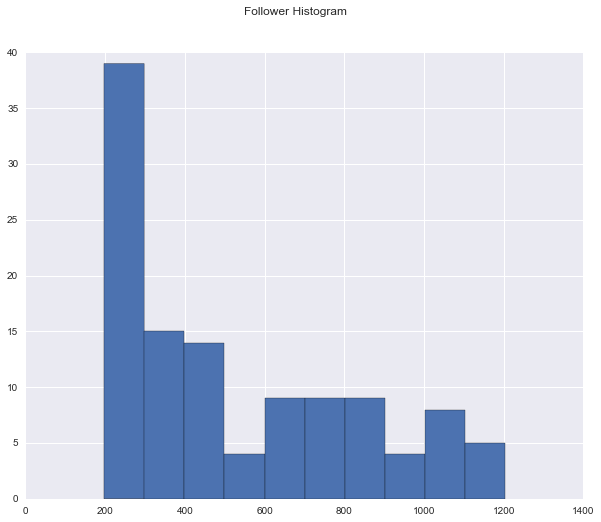

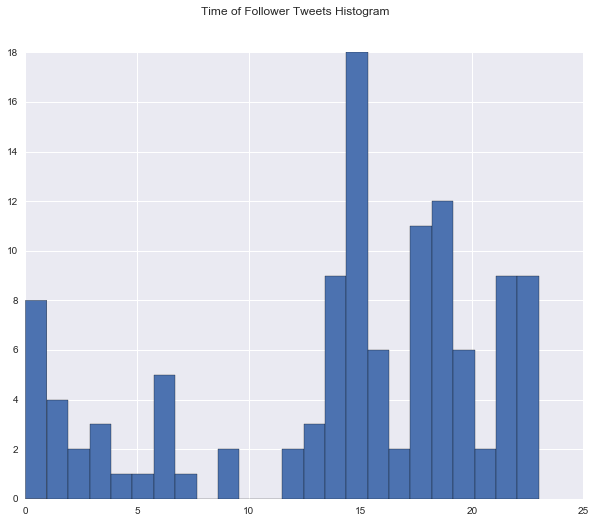

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


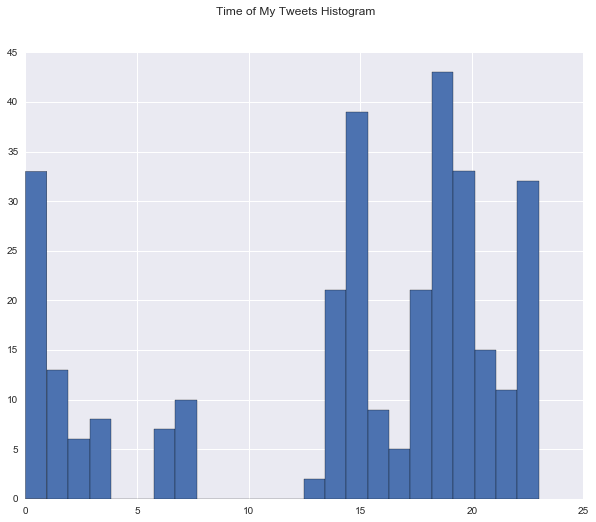

In [8]:

clean_df = df.loc[(df['created_at'] >= np.datetime64('2017-07-23')) & 
                  (df['screen_name'] != 'realscientists') & 
                  (df['text'].str.find('RT') != 0)].drop_duplicates(subset=['screen_name'])

def convert_hour(d):
    dt = d
    dt64 = np.datetime64(dt)
    ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    x = datetime.datetime.utcfromtimestamp(ts)
    return x.hour

clean_df['hour'] = clean_df['created_at'].apply(convert_hour)

clean_df.loc[clean_df['followers'].between(clean_df['followers'].describe()[4],clean_df['followers'].describe()[6]), 
             'followers'].hist(figsize=(10,8))
plt.suptitle('Follower Histogram')
plt.show()

clean_df.loc[clean_df['followers'].between(clean_df['followers'].describe()[4],clean_df['followers'].describe()[6]), 
             'hour'].hist(bins=24, figsize=(10,8))
plt.suptitle('Time of Follower Tweets Histogram')
plt.show()


my_df = df.loc[(df['created_at'] >= np.datetime64('2017-07-23')) & 
               (df['screen_name'] == 'realscientists') & 
               (df['text'].str.find('RT') != 0)]
my_df['hour'] = my_df['created_at'].apply(convert_hour)

my_df.loc[my_df['followers'].between(my_df['followers'].describe()[4],my_df['followers'].describe()[6]), 
             'hour'].hist(bins=24, figsize=(10,8))
plt.suptitle('Time of My Tweets Histogram')
plt.show()
